In [ ]:
import copy
def aplica_operacao(qc,op):
  res=copy.deepcopy(qc)
  i=0
  j=0
  for i in range(len(res)):
    for j in range(len(res[i])):
      if res[i][j]==0:
        break
    if res[i][j]==0:
      break
  if op=="c" and i>0:
    res[i][j]=res[i-1][j]
    res[i-1][j]=0
  if op=="b" and i<2:
    res[i][j]=res[i+1][j]
    res[i+1][j]=0
  if op=="e" and j>0:
    res[i][j]=res[i][j-1]
    res[i][j-1]=0
  if op=="d" and j<2:
    res[i][j]=res[i][j+1]
    res[i][j+1]=0

  return res

def mostra_qc(qc):
  texto=""
  for i in range(len(qc)):
    for j in range(len(qc[i])):
      texto=texto+str(qc[i][j])
    texto=texto+"\n"
  print(texto)

def calc_pecas_corretas(qc):
  h=0
  i=0
  for linha in qc:
      for elemento in linha:
        if elemento==i:
          h=h+1
        i=i+1
  return h

def simula_qc(ops):
  global qc_inicial
  qc=qc_inicial
  for op in ops:
    qc=aplica_operacao(qc,op)
  return qc


In [ ]:
import random
import numpy as np
#função que transforma o genótipo no fenótipo
def calc_fenotipo(genotipo):
  fenotipo=[]
  ops=['c','b','d','e']
  for digito in genotipo:
    if digito<4:
      fenotipo.append(ops[digito])
    else:
      break
  return fenotipo


#gera população inicial
def gera_pop_inicial(tam_pop,quant_digitos):
  pop=[]
  for i in range(tam_pop):
    genotipo=[]
    for i2 in range(quant_digitos):
      genotipo.append(random.randint(0,4))
    pop.append(genotipo)
  return pop

#calcula a aptidão do genótipo
def calc_aptidao(genotipo):
  fenotipo=calc_fenotipo(genotipo)
  qc=simula_qc(fenotipo)
  aptidao=calc_pecas_corretas(qc)*100-len(fenotipo)
  return aptidao

#função que recebe dois códigos genéticos e gera um filho
def cruzamento(genitor1, genitor2):
  ponto = random.randint(1,len(genitor1))
  filho = genitor1[0:ponto]+genitor2[ponto:]
  return filho

#função que pode aleatoriamente mudar algum dígito
def mutacao(genotipo, taxa_mutacao):
  for i in range(len(genotipo)):
    if random.random()<taxa_mutacao:
      genotipo[i]=random.randint(0,4)
  return genotipo

#gera a próxima geração da população a partir dos genitores
def reproducao(genitores, tam_pop, taxa_mutacao):
  pop=[]
  for i in range(tam_pop):
    #random.choice escolhe um elemento aleatoriamente da lista
    genitor1=random.choice(genitores)
    genitor2=random.choice(genitores)
    filho=cruzamento(genitor1, genitor2)
    filho=mutacao(filho, taxa_mutacao)
    pop.append(filho)
  return pop

#seleciona os genitores usando torneios
def selecao(pop, quant_selecao, tam_torneio):
  genitores=[]
  for i in range(quant_selecao):
    #realiza o torneio
    selecionado=None
    max_aptidao=-np.inf
    for i2 in range(tam_torneio):
      genotipo=random.choice(pop)
      aptidao=calc_aptidao(genotipo)
      if aptidao>max_aptidao:
        selecionado=genotipo
        max_aptidao=aptidao
    genitores.append(selecionado)
  return genitores

#retorna o melhor elemento da população
def get_melhor_genotipo(pop):
  melhor_genotipo=None
  max_aptidao=-np.inf
  for genotipo in pop:
    aptidao=calc_aptidao(genotipo)
    if aptidao>max_aptidao:
      melhor_genotipo=genotipo
      max_aptidao=aptidao
  return melhor_genotipo, max_aptidao

#algoritmo genético
def algoritmo_genetico(quant_geracoes, tam_pop, quant_digitos, quant_selecao, taxa_mutacao, tam_torneio):
  melhor_genotipo=None
  max_aptidao=-np.inf
  aptidoes=[]
  pop=gera_pop_inicial(tam_pop,quant_digitos)
  genotipo,aptidao=get_melhor_genotipo(pop)
  aptidoes.append(aptidao)
  for i in range(quant_geracoes):
    genitores=selecao(pop,quant_selecao,tam_torneio)
    pop=reproducao(genitores,tam_pop,taxa_mutacao)
    genotipo,aptidao=get_melhor_genotipo(pop)
    aptidoes.append(aptidao)
    if aptidao>max_aptidao:
      melhor_genotipo=genotipo
      max_aptidao=aptidao
  return calc_fenotipo(melhor_genotipo), aptidoes



245
308
617

None
solução do QC =  ['b', 'd', 'c', 'e', 'c', 'e', 'b', 'd', 'd', 'c', 'e', 'b', 'b', 'c', 'e', 'c']
012
345
678

None


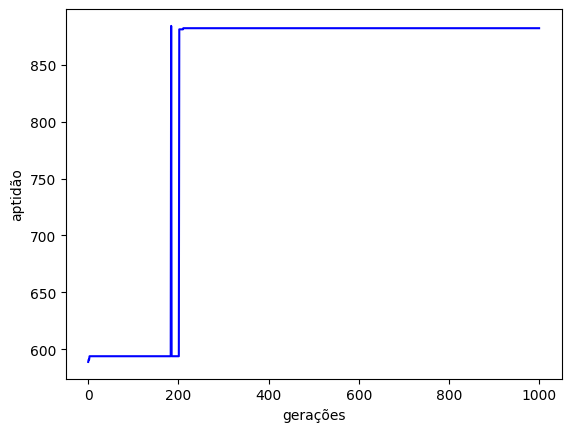

In [ ]:
import matplotlib.pyplot as plt
#testa o algoritmo genético
quant_geracoes=1000
tam_pop=1000
quant_digitos=20
quant_selecao=100
taxa_mutacao=0.05
tam_torneio=10

qc_inicial=[[2,4,5],[3,0,8],[6,1,7]]
print(mostra_qc(qc_inicial))

resposta, aptidoes=algoritmo_genetico(quant_geracoes, tam_pop, quant_digitos, quant_selecao, taxa_mutacao, tam_torneio)
print("solução do QC = ",resposta)
qc=simula_qc(resposta)
print(mostra_qc(qc))


plt.plot(aptidoes,'-b')
plt.xlabel("gerações")
plt.ylabel("aptidão")
plt.show()